In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pib = pd.read_csv('pib.csv')
pop = pd.read_csv('população.csv')
ids = pd.read_excel('acp_codigos.xls')

In [3]:
pib.head()

,Município,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita
0,350010 Adamantina,305404.0,4.0,310492.0,9.0,349499.0,7.0,417286.0,6.0,423727.0,2.0,444790.0,8.0,531900.0,0.0,558184.0,5.0
1,350020 Adolfo,40300.0,8.0,43477.0,1.0,40537.0,2.0,49570.0,1.0,77348.0,1.0,70544.0,2.0,68428.0,4.0,102877.0,2.0
2,350030 Aguaí,300903.0,5.0,445295.0,2.0,413440.0,9.0,541218.0,1.0,690819.0,6.0,576466.0,7.0,476557.0,7.0,612384.0,2.0
3,350040 Águas da Prata,60158.0,3.0,76977.0,6.0,52435.0,4.0,69880.0,3.0,91567.0,9.0,120911.0,5.0,192819.0,4.0,226762.0,1.0
4,350050 Águas de Lindóia,100904.0,7.0,106176.0,2.0,121673.0,8.0,130813.0,8.0,136718.0,8.0,146472.0,5.0,172776.0,7.0,197044.0,9.0


In [4]:
pop.head()

,Município,2003,2004,2005,2006,2007,2008,2009,2010
0,350010 Adamantina,33928.0,34068.0,34376.0,34537.0,34689.0,34366.0,34423.0,33797.0
1,350020 Adolfo,3813.0,3848.0,3943.0,3987.0,4032.0,3711.0,3709.0,3557.0
2,350030 Aguaí,29686.0,30154.0,31220.0,31768.0,32306.0,31763.0,32108.0,32148.0
3,350040 Águas da Prata,7267.0,7306.0,7405.0,7455.0,7506.0,7684.0,7736.0,7584.0
4,350050 Águas de Lindóia,17494.0,17904.0,18768.0,19239.0,19713.0,16335.0,16341.0,17266.0


In [5]:
inf = pib['Município'].str.split(" ", n = 1, expand=True)
inf2 = pop['Município'].str.split(" ", n = 1, expand=True)

In [6]:
pib['ID'] = inf[0]
pib['Município'] = inf[1]
pop['ID'] = inf2[0]
pop['Município'] = inf2[1]

In [7]:
anos = ['2003','2004','2005', '2006','2007','2008','2009','2010']
ids[ids['Nome_mun']=='São Paulo']

,UF,ACP,NOME_ACP,codmun,Nome_mun
193,35,350101,ACP de São Paulo,3550308,São Paulo


In [8]:
ids['codmun'] = ids['codmun'].apply(str)
ids['codmun'] = ids['codmun'].str.slice(stop=6)

In [9]:
ids.columns = ['UF','ACP','NOME_ACP','ID','Nome_mun']
ids

,UF,ACP,NOME_ACP,ID,Nome_mun
0,13,130100,ACP de Manaus,130260,Manaus
1,15,150100,ACP de Belém,150080,Ananindeua
2,15,150100,ACP de Belém,150130,Barcarena
3,15,150100,ACP de Belém,150140,Belém
4,15,150100,ACP de Belém,150150,Benevides
...,...,...,...,...,...
330,53,530100,ACP de Brasília,521560,Padre Bernardo
331,53,530100,ACP de Brasília,521760,Planaltina
332,53,530100,ACP de Brasília,521975,Santo Antônio do Descoberto
333,53,530100,ACP de Brasília,522185,Valparaíso de Goiás


In [10]:
pop.reset_index(drop=True, inplace=True)
pib.reset_index(drop=True, inplace=True)

In [11]:
pop

,Município,2003,2004,2005,2006,2007,2008,2009,2010,ID
0,Adamantina,33928.0,34068.0,34376.0,34537.0,34689.0,34366.0,34423.0,33797.0,350010
1,Adolfo,3813.0,3848.0,3943.0,3987.0,4032.0,3711.0,3709.0,3557.0,350020
2,Aguaí,29686.0,30154.0,31220.0,31768.0,32306.0,31763.0,32108.0,32148.0,350030
3,Águas da Prata,7267.0,7306.0,7405.0,7455.0,7506.0,7684.0,7736.0,7584.0,350040
4,Águas de Lindóia,17494.0,17904.0,18768.0,19239.0,19713.0,16335.0,16341.0,17266.0,350050
...,...,...,...,...,...,...,...,...,...,...
642,Votorantim,100603.0,102083.0,105446.0,107157.0,108851.0,104413.0,105190.0,108809.0,355700
643,Votuporanga,79026.0,80100.0,82527.0,83762.0,84994.0,80819.0,81277.0,84692.0,355710
644,Zacarias,1947.0,1947.0,1941.0,1940.0,1946.0,2384.0,2425.0,2335.0,355715
645,None,38709339.0,39239362.0,40442820.0,41055761.0,41663568.0,41011635.0,41384089.0,41262199.0,Total


In [12]:
row_1 = pop.iloc[36] + pop.iloc[331]
pop = pop.append([row_1])
row_2=pop.iloc[68] + pop.iloc[354]
pop = pop.append([row_2])
row_3 = pop.iloc[568]+pop.iloc[236]
pop = pop.append([row_3])
pop = pop[pop.Município != 'Matão']
pop = pop[pop.Município != 'Araraquara']
pop = pop[pop.Município != 'Monte Azul']
pop = pop[pop.Município != 'Paulista']
pop = pop[pop.Município != 'Bebedouro']
pop = pop[pop.Município != 'São Sebastião']
pop = pop[pop.Município != 'Ilhabela']
row_3=pib.iloc[36] + pib.iloc[331]
pib = pib.append([row_3])
row_1=pib.iloc[68] + pib.iloc[354]
pib = pib.append([row_1])
row_2=pib.iloc[568] + pib.iloc[236]
pib = pib.append([row_2])
pib = pib[pib.Município != 'Matão']
pib = pib[pib.Município != 'Araraquara']
pib = pib[pib.Município != 'Monte Azul']
pib = pib[pib.Município != 'Paulista']
pib = pib[pib.Município != 'Bebedouro']
pib = pib[pib.Município != 'São Sebastião']
pib = pib[pib.Município != 'Ilhabela']
pop = pop[pop.Município != 'AraraquaraMatão']
pop = pop[pop.Município != 'BebedouroMonte Azul Paulista']
pop = pop[pop.Município != 'São SebastiãoIlhabela']
pib = pib[pib.Município != 'AraraquaraMatão']
pib = pib[pib.Município != 'BebedouroMonte Azul Paulista']
pib = pib[pib.Município != 'São SebastiãoIlhabela']

In [13]:
pib

,Município,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita,ID
0,Adamantina,305404.0,4.0,310492.0,9.0,349499.0,7.0,417286.0,6.0,423727.0,2.0,4.447900e+05,8.0,5.319000e+05,0.0,5.581840e+05,5.0,350010
1,Adolfo,40300.0,8.0,43477.0,1.0,40537.0,2.0,49570.0,1.0,77348.0,1.0,7.054400e+04,2.0,6.842800e+04,4.0,1.028770e+05,2.0,350020
2,Aguaí,300903.0,5.0,445295.0,2.0,413440.0,9.0,541218.0,1.0,690819.0,6.0,5.764660e+05,7.0,4.765570e+05,7.0,6.123840e+05,2.0,350030
3,Águas da Prata,60158.0,3.0,76977.0,6.0,52435.0,4.0,69880.0,3.0,91567.0,9.0,1.209110e+05,5.0,1.928190e+05,4.0,2.267620e+05,1.0,350040
4,Águas de Lindóia,100904.0,7.0,106176.0,2.0,121673.0,8.0,130813.0,8.0,136718.0,8.0,1.464720e+05,5.0,1.727760e+05,7.0,1.970440e+05,9.0,350050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Votorantim,852822.0,0.0,925412.0,1.0,958360.0,9.0,1058699.0,2.0,1319379.0,0.0,1.524216e+06,6.0,1.810259e+06,1.0,2.091438e+06,3.0,355700
643,Votuporanga,622587.0,8.0,707886.0,4.0,783873.0,9.0,891757.0,4.0,1003025.0,6.0,1.108729e+06,9.0,1.138007e+06,7.0,1.341796e+06,6.0,355710
644,Zacarias,21233.0,2.0,22010.0,1.0,24856.0,5.0,26431.0,9.0,35764.0,5.0,3.839900e+04,0.0,4.057300e+04,2.0,5.438300e+04,3.0,355715
645,None,579846916.0,3.0,643487492.0,5.0,726984045.0,3.0,802654614.0,9.0,902784266.0,9.0,1.003015e+09,6.0,1.084353e+09,1.0,1.247596e+09,4.0,Total


In [14]:
pop.ID[pop.ID=='350320352930'] = '350610'

In [15]:
pop.ID[pop.ID=='350610353150'] = '352040'

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
pop.ID[pop.ID=='355070352040'] = '352930'

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
pop

,Município,2003,2004,2005,2006,2007,2008,2009,2010,ID
0,Adamantina,33928.0,34068.0,34376.0,34537.0,34689.0,34366.0,34423.0,33797.0,350010
1,Adolfo,3813.0,3848.0,3943.0,3987.0,4032.0,3711.0,3709.0,3557.0,350020
2,Aguaí,29686.0,30154.0,31220.0,31768.0,32306.0,31763.0,32108.0,32148.0,350030
3,Águas da Prata,7267.0,7306.0,7405.0,7455.0,7506.0,7684.0,7736.0,7584.0,350040
4,Águas de Lindóia,17494.0,17904.0,18768.0,19239.0,19713.0,16335.0,16341.0,17266.0,350050
...,...,...,...,...,...,...,...,...,...,...
642,Votorantim,100603.0,102083.0,105446.0,107157.0,108851.0,104413.0,105190.0,108809.0,355700
643,Votuporanga,79026.0,80100.0,82527.0,83762.0,84994.0,80819.0,81277.0,84692.0,355710
644,Zacarias,1947.0,1947.0,1941.0,1940.0,1946.0,2384.0,2425.0,2335.0,355715
645,None,38709339.0,39239362.0,40442820.0,41055761.0,41663568.0,41011635.0,41384089.0,41262199.0,Total


In [18]:
pib.ID[pib.ID=='350320352930'] = '350610'

In [19]:
pib.ID[pib.ID=='350610353150'] = '352040'

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
pib.ID[pib.ID=='355070352040'] = '352930'

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
ids['ID'] = ids['ID'].astype(float)
pop = pop.drop([645,646], axis=0)
pop['ID'] = pop['ID'].astype(float)

In [22]:
ids = ids[['ID','UF','ACP','NOME_ACP','Nome_mun']]

In [23]:
pop_ = ids.merge(pop, left_on='ID',right_on='ID')
pop_

,ID,UF,ACP,NOME_ACP,Nome_mun,Município,2003,2004,2005,2006,2007,2008,2009,2010
0,350115.0,35,350101,ACP de São Paulo,Alumínio,Alumínio,15712.0,15856.0,16189.0,16358.0,16523.0,16331.0,16430.0,16839.0
1,350275.0,35,350101,ACP de São Paulo,Araçariguama,Araçariguama,12459.0,12869.0,13803.0,14281.0,14756.0,13027.0,13206.0,17080.0
2,350390.0,35,350101,ACP de São Paulo,Arujá,Arujá,65825.0,67924.0,72696.0,75119.0,77530.0,78960.0,80925.0,74905.0
3,350410.0,35,350101,ACP de São Paulo,Atibaia,Atibaia,118989.0,121418.0,126942.0,129754.0,132538.0,125418.0,126754.0,126603.0
4,350570.0,35,350101,ACP de São Paulo,Barueri,Barueri,232148.0,239697.0,256825.0,265547.0,274199.0,264619.0,270172.0,240749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,350460.0,35,350300,ACP de São José do Rio Preto,Bady Bassitt,Bady Bassitt,13348.0,13915.0,15204.0,15861.0,16515.0,13898.0,14126.0,14603.0
95,351130.0,35,350300,ACP de São José do Rio Preto,Cedral,Cedral,7007.0,7104.0,7325.0,7437.0,7552.0,8119.0,8264.0,7972.0
96,351750.0,35,350300,ACP de São José do Rio Preto,Guapiaçu,Guapiaçu,15138.0,15472.0,16231.0,16617.0,17002.0,17593.0,17934.0,17869.0
97,353030.0,35,350300,ACP de São José do Rio Preto,Mirassol,Mirassol,51112.0,51993.0,53988.0,55009.0,56017.0,54350.0,54922.0,53792.0


In [24]:
pop_['NOME_ACP'] = pop_['NOME_ACP'].str.slice(start=6)
pop_

,ID,UF,ACP,NOME_ACP,Nome_mun,Município,2003,2004,2005,2006,2007,2008,2009,2010
0,350115.0,35,350101,São Paulo,Alumínio,Alumínio,15712.0,15856.0,16189.0,16358.0,16523.0,16331.0,16430.0,16839.0
1,350275.0,35,350101,São Paulo,Araçariguama,Araçariguama,12459.0,12869.0,13803.0,14281.0,14756.0,13027.0,13206.0,17080.0
2,350390.0,35,350101,São Paulo,Arujá,Arujá,65825.0,67924.0,72696.0,75119.0,77530.0,78960.0,80925.0,74905.0
3,350410.0,35,350101,São Paulo,Atibaia,Atibaia,118989.0,121418.0,126942.0,129754.0,132538.0,125418.0,126754.0,126603.0
4,350570.0,35,350101,São Paulo,Barueri,Barueri,232148.0,239697.0,256825.0,265547.0,274199.0,264619.0,270172.0,240749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,350460.0,35,350300,São José do Rio Preto,Bady Bassitt,Bady Bassitt,13348.0,13915.0,15204.0,15861.0,16515.0,13898.0,14126.0,14603.0
95,351130.0,35,350300,São José do Rio Preto,Cedral,Cedral,7007.0,7104.0,7325.0,7437.0,7552.0,8119.0,8264.0,7972.0
96,351750.0,35,350300,São José do Rio Preto,Guapiaçu,Guapiaçu,15138.0,15472.0,16231.0,16617.0,17002.0,17593.0,17934.0,17869.0
97,353030.0,35,350300,São José do Rio Preto,Mirassol,Mirassol,51112.0,51993.0,53988.0,55009.0,56017.0,54350.0,54922.0,53792.0


In [25]:
pib = pib.drop([645,646], axis=0)
pib['ID'] = pib['ID'].astype(float)

In [26]:
pib_ = ids.merge(pib, left_on='ID',right_on='ID')
pib_['NOME_ACP'] = pib_['NOME_ACP'].str.slice(start=6)
pib_

,ID,UF,ACP,NOME_ACP,Nome_mun,Município,2003,2003 per capita,2004,2004 per capita,...,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita
0,350115.0,35,350101,São Paulo,Alumínio,Alumínio,786789.0,8.0,1350245.0,5.0,...,1720204.0,9.0,1893764.0,4.0,1714602.0,4.0,1694184.0,2.0,1790693.0,8.0
1,350275.0,35,350101,São Paulo,Araçariguama,Araçariguama,295228.0,2.0,366817.0,2.0,...,486139.0,3.0,876908.0,4.0,1468108.0,6.0,1460137.0,8.0,1501869.0,7.0
2,350390.0,35,350101,São Paulo,Arujá,Arujá,653534.0,9.0,819954.0,3.0,...,1076513.0,3.0,1158498.0,2.0,1502108.0,2.0,1529640.0,3.0,2045662.0,1.0
3,350410.0,35,350101,São Paulo,Atibaia,Atibaia,1162401.0,7.0,1316223.0,6.0,...,1660825.0,8.0,2021903.0,9.0,2196639.0,3.0,2625581.0,7.0,3062679.0,6.0
4,350570.0,35,350101,São Paulo,Barueri,Barueri,13707696.0,3.0,17102173.0,1.0,...,25570469.0,6.0,26076920.0,2.0,27143412.0,2.0,26909801.0,6.0,27752428.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,350460.0,35,350300,São José do Rio Preto,Bady Bassitt,Bady Bassitt,102235.0,3.0,131805.0,9.0,...,149680.0,4.0,207144.0,1.0,166014.0,4.0,192817.0,6.0,325897.0,1.0
95,351130.0,35,350300,São José do Rio Preto,Cedral,Cedral,55359.0,1.0,66235.0,2.0,...,80974.0,6.0,88295.0,6.0,139572.0,7.0,102839.0,1.0,123176.0,9.0
96,351750.0,35,350300,São José do Rio Preto,Guapiaçu,Guapiaçu,253150.0,5.0,276709.0,5.0,...,310894.0,7.0,377895.0,9.0,463678.0,2.0,389884.0,4.0,369052.0,7.0
97,353030.0,35,350300,São José do Rio Preto,Mirassol,Mirassol,452917.0,7.0,466072.0,6.0,...,606374.0,9.0,675289.0,8.0,708306.0,8.0,773453.0,6.0,942084.0,4.0


In [27]:
for ano in anos:
    pib_1 = pd.DataFrame(pib_.groupby(['ACP']).sum())

In [28]:
pib_1

,ID,UF,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita
ACP,,,,,,,,,,,,,,,,,,
350101,16581090.0,1645,327983879.0,204.0,363393608.0,214.0,418113557.0,227.0,458427185.0,243.0,521850603.0,216.0,582238206.0,211.0,624253514.0,228.0,714586138.0,201.0
350102,4943807.0,490,41026186.0,81.0,48221263.0,55.0,54974033.0,71.0,59234859.0,71.0,65731477.0,70.0,74058308.0,77.0,81280775.0,67.0,93380173.0,53.0
350103,2823225.0,280,19820904.0,40.0,21618784.0,41.0,27458468.0,33.0,29743259.0,34.0,34270595.0,29.0,40668403.0,47.0,39463100.0,29.0,46607362.0,38.0
350104,2122970.0,210,24285400.0,16.0,29106421.0,29.0,28809013.0,14.0,29754927.0,24.0,33419337.0,25.0,38271628.0,29.0,41874031.0,25.0,47016436.0,39.0
350105,3179510.0,315,12399375.0,34.0,14214467.0,47.0,16225081.0,55.0,17870684.0,34.0,20550002.0,22.0,22841682.0,39.0,25361819.0,40.0,28340251.0,46.0
350106,2115170.0,210,12378509.0,29.0,14657524.0,27.0,15496172.0,32.0,18720115.0,32.0,24029742.0,34.0,25031078.0,25.0,27487921.0,36.0,35033706.0,39.0
350200,1417170.0,140,10077580.0,20.0,11044532.0,17.0,12743791.0,22.0,14862515.0,20.0,16499240.0,26.0,18198796.0,21.0,20033104.0,20.0,23099772.0,23.0
350300,1761350.0,175,4941027.0,22.0,5423336.0,26.0,6366372.0,22.0,6888336.0,34.0,7741149.0,31.0,8512458.0,30.0,9337742.0,23.0,10742207.0,27.0


In [29]:
anos = ['2003','2004','2005', '2006','2007','2008','2009','2010']
for ano in anos:
    pop_1 = pd.DataFrame(pop_.groupby(['ACP']).sum())
pop_1

,ID,UF,2003,2004,2005,2006,2007,2008,2009,2010
ACP,,,,,,,,,,
350101,16581090.0,1645,18998379.0,19242459.0,19796630.0,20078853.0,20358720.0,20002764.0,20167472.0,20096809.0
350102,4943807.0,490,2320793.0,2362623.0,2457578.0,2505944.0,2553903.0,2547876.0,2582559.0,2603819.0
350103,2823225.0,280,1498643.0,1521823.0,1574411.0,1601196.0,1627760.0,1594755.0,1610740.0,1604363.0
350104,2122970.0,210,1274237.0,1293989.0,1338831.0,1361676.0,1384325.0,1359139.0,1373083.0,1392552.0
350105,3179510.0,315,1039198.0,1060725.0,1109634.0,1134524.0,1159219.0,1128318.0,1143475.0,1148035.0
350106,2115170.0,210,595834.0,606182.0,629687.0,641658.0,653525.0,642794.0,650422.0,674877.0
350200,1417170.0,140,695549.0,705866.0,729284.0,741211.0,753038.0,743529.0,751153.0,791295.0
350300,1761350.0,175,468878.0,478265.0,499575.0,510433.0,521200.0,508232.0,514879.0,502494.0


In [30]:
ACPS=['São Paulo','Campinas','Santos','São José dos Campos','Sorocaba','Jundiaí','Ribeirão Preto','São José do Rio Preto']
pop_1['NOME_ACP'] = ACPS
pop_1['Nome_mun']=ACPS
pop_1

,ID,UF,2003,2004,2005,2006,2007,2008,2009,2010,NOME_ACP,Nome_mun
ACP,,,,,,,,,,,,
350101,16581090.0,1645,18998379.0,19242459.0,19796630.0,20078853.0,20358720.0,20002764.0,20167472.0,20096809.0,São Paulo,São Paulo
350102,4943807.0,490,2320793.0,2362623.0,2457578.0,2505944.0,2553903.0,2547876.0,2582559.0,2603819.0,Campinas,Campinas
350103,2823225.0,280,1498643.0,1521823.0,1574411.0,1601196.0,1627760.0,1594755.0,1610740.0,1604363.0,Santos,Santos
350104,2122970.0,210,1274237.0,1293989.0,1338831.0,1361676.0,1384325.0,1359139.0,1373083.0,1392552.0,São José dos Campos,São José dos Campos
350105,3179510.0,315,1039198.0,1060725.0,1109634.0,1134524.0,1159219.0,1128318.0,1143475.0,1148035.0,Sorocaba,Sorocaba
350106,2115170.0,210,595834.0,606182.0,629687.0,641658.0,653525.0,642794.0,650422.0,674877.0,Jundiaí,Jundiaí
350200,1417170.0,140,695549.0,705866.0,729284.0,741211.0,753038.0,743529.0,751153.0,791295.0,Ribeirão Preto,Ribeirão Preto
350300,1761350.0,175,468878.0,478265.0,499575.0,510433.0,521200.0,508232.0,514879.0,502494.0,São José do Rio Preto,São José do Rio Preto


In [31]:
pop_500 = pd.merge(pop,pop_, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [32]:
pop_500.reset_index()

,index,Município,2003,2004,2005,2006,2007,2008,2009,2010,ID,UF,ACP,NOME_ACP,Nome_mun
0,0,Adamantina,33928.0,34068.0,34376.0,34537.0,34689.0,34366.0,34423.0,33797.0,350010.0,NaN,NaN,NaN,NaN
1,1,Adolfo,3813.0,3848.0,3943.0,3987.0,4032.0,3711.0,3709.0,3557.0,350020.0,NaN,NaN,NaN,NaN
2,2,Aguaí,29686.0,30154.0,31220.0,31768.0,32306.0,31763.0,32108.0,32148.0,350030.0,NaN,NaN,NaN,NaN
3,3,Águas da Prata,7267.0,7306.0,7405.0,7455.0,7506.0,7684.0,7736.0,7584.0,350040.0,NaN,NaN,NaN,NaN
4,4,Águas de Lindóia,17494.0,17904.0,18768.0,19239.0,19713.0,16335.0,16341.0,17266.0,350050.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,634,Viradouro,16847.0,17126.0,17759.0,18084.0,18405.0,17924.0,18115.0,17297.0,355680.0,NaN,NaN,NaN,NaN
537,635,Vista Alegre do Alto,5104.0,5217.0,5468.0,5597.0,5729.0,6682.0,6870.0,6886.0,355690.0,NaN,NaN,NaN,NaN
538,636,Vitória Brasil,1745.0,1766.0,1819.0,1845.0,1872.0,1664.0,1671.0,1737.0,355695.0,NaN,NaN,NaN,NaN
539,638,Votuporanga,79026.0,80100.0,82527.0,83762.0,84994.0,80819.0,81277.0,84692.0,355710.0,NaN,NaN,NaN,NaN


In [33]:
pib_500 = pd.merge(pib,pib_, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [34]:
pib_500.reset_index()

,index,Município,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,...,2008 per capita,2009,2009 per capita,2010,2010 per capita,ID,UF,ACP,NOME_ACP,Nome_mun
0,0,Adamantina,305404.0,4.0,310492.0,9.0,349499.0,7.0,417286.0,6.0,...,8.0,531900.0,0.0,558184.0,5.0,350010.0,NaN,NaN,NaN,NaN
1,1,Adolfo,40300.0,8.0,43477.0,1.0,40537.0,2.0,49570.0,1.0,...,2.0,68428.0,4.0,102877.0,2.0,350020.0,NaN,NaN,NaN,NaN
2,2,Aguaí,300903.0,5.0,445295.0,2.0,413440.0,9.0,541218.0,1.0,...,7.0,476557.0,7.0,612384.0,2.0,350030.0,NaN,NaN,NaN,NaN
3,3,Águas da Prata,60158.0,3.0,76977.0,6.0,52435.0,4.0,69880.0,3.0,...,5.0,192819.0,4.0,226762.0,1.0,350040.0,NaN,NaN,NaN,NaN
4,4,Águas de Lindóia,100904.0,7.0,106176.0,2.0,121673.0,8.0,130813.0,8.0,...,5.0,172776.0,7.0,197044.0,9.0,350050.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,634,Viradouro,111180.0,3.0,101868.0,8.0,120370.0,2.0,132003.0,8.0,...,3.0,150440.0,1.0,172020.0,3.0,355680.0,NaN,NaN,NaN,NaN
537,635,Vista Alegre do Alto,86043.0,0.0,95533.0,6.0,103176.0,7.0,108084.0,7.0,...,8.0,144306.0,6.0,167177.0,6.0,355690.0,NaN,NaN,NaN,NaN
538,636,Vitória Brasil,11287.0,0.0,12261.0,9.0,13615.0,8.0,16606.0,3.0,...,2.0,17445.0,7.0,23413.0,5.0,355695.0,NaN,NaN,NaN,NaN
539,638,Votuporanga,622587.0,8.0,707886.0,4.0,783873.0,9.0,891757.0,4.0,...,9.0,1138007.0,7.0,1341796.0,6.0,355710.0,NaN,NaN,NaN,NaN


In [35]:
pop_1['Município'] = pop_1['Nome_mun']

In [36]:
ACPS=['São Paulo','Campinas','Santos','São José dos Campos','Sorocaba','Jundiaí','Ribeirão Preto','São José do Rio Preto']
pib_1['NOME_ACP'] = ACPS
pib_1['Nome_mun'] = ACPS
pib_1

,ID,UF,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita,NOME_ACP,Nome_mun
ACP,,,,,,,,,,,,,,,,,,,,
350101,16581090.0,1645,327983879.0,204.0,363393608.0,214.0,418113557.0,227.0,458427185.0,243.0,521850603.0,216.0,582238206.0,211.0,624253514.0,228.0,714586138.0,201.0,São Paulo,São Paulo
350102,4943807.0,490,41026186.0,81.0,48221263.0,55.0,54974033.0,71.0,59234859.0,71.0,65731477.0,70.0,74058308.0,77.0,81280775.0,67.0,93380173.0,53.0,Campinas,Campinas
350103,2823225.0,280,19820904.0,40.0,21618784.0,41.0,27458468.0,33.0,29743259.0,34.0,34270595.0,29.0,40668403.0,47.0,39463100.0,29.0,46607362.0,38.0,Santos,Santos
350104,2122970.0,210,24285400.0,16.0,29106421.0,29.0,28809013.0,14.0,29754927.0,24.0,33419337.0,25.0,38271628.0,29.0,41874031.0,25.0,47016436.0,39.0,São José dos Campos,São José dos Campos
350105,3179510.0,315,12399375.0,34.0,14214467.0,47.0,16225081.0,55.0,17870684.0,34.0,20550002.0,22.0,22841682.0,39.0,25361819.0,40.0,28340251.0,46.0,Sorocaba,Sorocaba
350106,2115170.0,210,12378509.0,29.0,14657524.0,27.0,15496172.0,32.0,18720115.0,32.0,24029742.0,34.0,25031078.0,25.0,27487921.0,36.0,35033706.0,39.0,Jundiaí,Jundiaí
350200,1417170.0,140,10077580.0,20.0,11044532.0,17.0,12743791.0,22.0,14862515.0,20.0,16499240.0,26.0,18198796.0,21.0,20033104.0,20.0,23099772.0,23.0,Ribeirão Preto,Ribeirão Preto
350300,1761350.0,175,4941027.0,22.0,5423336.0,26.0,6366372.0,22.0,6888336.0,34.0,7741149.0,31.0,8512458.0,30.0,9337742.0,23.0,10742207.0,27.0,São José do Rio Preto,São José do Rio Preto


In [37]:
pib_1['Município'] = pib_1['Nome_mun']

In [38]:
pop_500 = pop_500.append(pop_1)

C:\Users\lucas\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [39]:
pop_500 = pop_500.drop(['Nome_mun','NOME_ACP','UF'],axis=1)

In [40]:
pop_500

,2003,2004,2005,2006,2007,2008,2009,2010,ACP,ID,Município
0,33928.0,34068.0,34376.0,34537.0,34689.0,34366.0,34423.0,33797.0,NaN,350010.0,Adamantina
1,3813.0,3848.0,3943.0,3987.0,4032.0,3711.0,3709.0,3557.0,NaN,350020.0,Adolfo
2,29686.0,30154.0,31220.0,31768.0,32306.0,31763.0,32108.0,32148.0,NaN,350030.0,Aguaí
3,7267.0,7306.0,7405.0,7455.0,7506.0,7684.0,7736.0,7584.0,NaN,350040.0,Águas da Prata
4,17494.0,17904.0,18768.0,19239.0,19713.0,16335.0,16341.0,17266.0,NaN,350050.0,Águas de Lindóia
...,...,...,...,...,...,...,...,...,...,...,...
350104,1274237.0,1293989.0,1338831.0,1361676.0,1384325.0,1359139.0,1373083.0,1392552.0,NaN,2122970.0,São José dos Campos
350105,1039198.0,1060725.0,1109634.0,1134524.0,1159219.0,1128318.0,1143475.0,1148035.0,NaN,3179510.0,Sorocaba
350106,595834.0,606182.0,629687.0,641658.0,653525.0,642794.0,650422.0,674877.0,NaN,2115170.0,Jundiaí
350200,695549.0,705866.0,729284.0,741211.0,753038.0,743529.0,751153.0,791295.0,NaN,1417170.0,Ribeirão Preto


In [41]:
pib_500=pib_500.append(pib_1)

In [42]:
pib_500 = pib_500.drop(['Nome_mun','NOME_ACP','UF'],axis=1)

In [43]:
pib_500

,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita,ACP,ID,Município
0,305404.0,4.0,310492.0,9.0,349499.0,7.0,417286.0,6.0,423727.0,2.0,444790.0,8.0,531900.0,0.0,558184.0,5.0,NaN,350010.0,Adamantina
1,40300.0,8.0,43477.0,1.0,40537.0,2.0,49570.0,1.0,77348.0,1.0,70544.0,2.0,68428.0,4.0,102877.0,2.0,NaN,350020.0,Adolfo
2,300903.0,5.0,445295.0,2.0,413440.0,9.0,541218.0,1.0,690819.0,6.0,576466.0,7.0,476557.0,7.0,612384.0,2.0,NaN,350030.0,Aguaí
3,60158.0,3.0,76977.0,6.0,52435.0,4.0,69880.0,3.0,91567.0,9.0,120911.0,5.0,192819.0,4.0,226762.0,1.0,NaN,350040.0,Águas da Prata
4,100904.0,7.0,106176.0,2.0,121673.0,8.0,130813.0,8.0,136718.0,8.0,146472.0,5.0,172776.0,7.0,197044.0,9.0,NaN,350050.0,Águas de Lindóia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350104,24285400.0,16.0,29106421.0,29.0,28809013.0,14.0,29754927.0,24.0,33419337.0,25.0,38271628.0,29.0,41874031.0,25.0,47016436.0,39.0,NaN,2122970.0,São José dos Campos
350105,12399375.0,34.0,14214467.0,47.0,16225081.0,55.0,17870684.0,34.0,20550002.0,22.0,22841682.0,39.0,25361819.0,40.0,28340251.0,46.0,NaN,3179510.0,Sorocaba
350106,12378509.0,29.0,14657524.0,27.0,15496172.0,32.0,18720115.0,32.0,24029742.0,34.0,25031078.0,25.0,27487921.0,36.0,35033706.0,39.0,NaN,2115170.0,Jundiaí
350200,10077580.0,20.0,11044532.0,17.0,12743791.0,22.0,14862515.0,20.0,16499240.0,26.0,18198796.0,21.0,20033104.0,20.0,23099772.0,23.0,NaN,1417170.0,Ribeirão Preto


In [44]:
pop_500 = pop_500[pop_500['2003']>50000]

In [45]:
pop_500 = pop_500.reset_index(drop=True)

In [46]:
pop_500

,2003,2004,2005,2006,2007,2008,2009,2010,ACP,ID,Município
0,63364.0,64302.0,66421.0,67503.0,68581.0,65466.0,65931.0,65829.0,NaN,350190.0,Amparo
1,56009.0,56278.0,56883.0,57193.0,57497.0,56505.0,56596.0,55334.0,NaN,350210.0,Andradina
2,174399.0,176025.0,179717.0,181597.0,183466.0,181143.0,182205.0,181579.0,NaN,350280.0,Araçatuba
3,109354.0,110981.0,114683.0,116564.0,118437.0,113645.0,114514.0,118843.0,NaN,350330.0,Araras
4,90774.0,91886.0,94412.0,95702.0,96978.0,97725.0,98715.0,95144.0,NaN,350400.0,Assis
5,81209.0,82705.0,86099.0,87832.0,89549.0,83744.0,84414.0,82934.0,NaN,350450.0,Avaré
6,106530.0,107356.0,109240.0,110192.0,111147.0,112804.0,113618.0,112101.0,NaN,350550.0,Barretos
7,53270.0,53953.0,55501.0,56290.0,57071.0,56022.0,56485.0,56476.0,NaN,350590.0,Batatais
8,332992.0,338344.0,350491.0,356680.0,362813.0,355675.0,359426.0,343937.0,NaN,350600.0,Bauru
9,100209.0,102073.0,106313.0,108474.0,110612.0,109451.0,110909.0,108728.0,NaN,350650.0,Birigui


In [47]:
df=pib_500.merge(pop_500, on='Município', how='inner')

In [48]:
df

,2003_x,2003 per capita,2004_x,2004 per capita,2005_x,2005 per capita,2006_x,2006 per capita,2007_x,2007 per capita,...,2003_y,2004_y,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y,ACP_y,ID_y
0,819185.0,1.0,1025230.0,8.0,1143226.0,7.0,1218895.0,9.0,1249683.0,6.0,...,63364.0,64302.0,66421.0,67503.0,68581.0,65466.0,65931.0,65829.0,NaN,350190.0
1,534002.0,6.0,613227.0,5.0,572734.0,5.0,703507.0,4.0,733649.0,9.0,...,56009.0,56278.0,56883.0,57193.0,57497.0,56505.0,56596.0,55334.0,NaN,350210.0
2,1560061.0,7.0,1712587.0,5.0,1885372.0,6.0,2165517.0,4.0,2470497.0,7.0,...,174399.0,176025.0,179717.0,181597.0,183466.0,181143.0,182205.0,181579.0,NaN,350280.0
3,1497453.0,2.0,1491409.0,5.0,1639512.0,7.0,1976557.0,1.0,2064757.0,4.0,...,109354.0,110981.0,114683.0,116564.0,118437.0,113645.0,114514.0,118843.0,NaN,350330.0
4,758014.0,1.0,833870.0,4.0,873095.0,5.0,938070.0,6.0,1031099.0,1.0,...,90774.0,91886.0,94412.0,95702.0,96978.0,97725.0,98715.0,95144.0,NaN,350400.0
5,572165.0,8.0,624024.0,9.0,672921.0,3.0,755022.0,7.0,787912.0,5.0,...,81209.0,82705.0,86099.0,87832.0,89549.0,83744.0,84414.0,82934.0,NaN,350450.0
6,1091086.0,2.0,1188573.0,3.0,1295252.0,0.0,1466238.0,7.0,1435900.0,2.0,...,106530.0,107356.0,109240.0,110192.0,111147.0,112804.0,113618.0,112101.0,NaN,350550.0
7,634201.0,7.0,638449.0,4.0,688457.0,6.0,808294.0,5.0,766086.0,2.0,...,53270.0,53953.0,55501.0,56290.0,57071.0,56022.0,56485.0,56476.0,NaN,350590.0
8,3199373.0,8.0,3557756.0,7.0,4146451.0,0.0,4721351.0,3.0,5259122.0,8.0,...,332992.0,338344.0,350491.0,356680.0,362813.0,355675.0,359426.0,343937.0,NaN,350600.0
9,806416.0,1.0,904605.0,3.0,1002127.0,0.0,1084478.0,3.0,1130361.0,6.0,...,100209.0,102073.0,106313.0,108474.0,110612.0,109451.0,110909.0,108728.0,NaN,350650.0


In [49]:
df1 = df

In [50]:
df=df[df.columns.drop(list(df.filter(regex='_y')))]

In [51]:
df.columns=pib_500.columns

In [52]:
df

,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita,ACP,ID,Município
0,819185.0,1.0,1025230.0,8.0,1143226.0,7.0,1218895.0,9.0,1249683.0,6.0,1406744.0,7.0,1783700.0,2.0,2023207.0,6.0,NaN,350190.0,Amparo
1,534002.0,6.0,613227.0,5.0,572734.0,5.0,703507.0,4.0,733649.0,9.0,746493.0,6.0,949425.0,0.0,1093720.0,8.0,NaN,350210.0,Andradina
2,1560061.0,7.0,1712587.0,5.0,1885372.0,6.0,2165517.0,4.0,2470497.0,7.0,2721728.0,8.0,3001295.0,5.0,3501841.0,3.0,NaN,350280.0,Araçatuba
3,1497453.0,2.0,1491409.0,5.0,1639512.0,7.0,1976557.0,1.0,2064757.0,4.0,2141150.0,3.0,2407244.0,8.0,2593933.0,4.0,NaN,350330.0,Araras
4,758014.0,1.0,833870.0,4.0,873095.0,5.0,938070.0,6.0,1031099.0,1.0,1087258.0,1.0,1258171.0,6.0,1358039.0,7.0,NaN,350400.0,Assis
5,572165.0,8.0,624024.0,9.0,672921.0,3.0,755022.0,7.0,787912.0,5.0,847368.0,3.0,1068963.0,5.0,1280040.0,1.0,NaN,350450.0,Avaré
6,1091086.0,2.0,1188573.0,3.0,1295252.0,0.0,1466238.0,7.0,1435900.0,2.0,1548989.0,1.0,1653272.0,4.0,1992336.0,5.0,NaN,350550.0,Barretos
7,634201.0,7.0,638449.0,4.0,688457.0,6.0,808294.0,5.0,766086.0,2.0,783286.0,5.0,895352.0,4.0,1126456.0,5.0,NaN,350590.0,Batatais
8,3199373.0,8.0,3557756.0,7.0,4146451.0,0.0,4721351.0,3.0,5259122.0,8.0,5984048.0,8.0,6793848.0,0.0,7423744.0,3.0,NaN,350600.0,Bauru
9,806416.0,1.0,904605.0,3.0,1002127.0,0.0,1084478.0,3.0,1130361.0,6.0,1256157.0,8.0,1409195.0,7.0,1631757.0,1.0,NaN,350650.0,Birigui


In [53]:
pib_500 = df

In [54]:
pib_500

,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita,ACP,ID,Município
0,819185.0,1.0,1025230.0,8.0,1143226.0,7.0,1218895.0,9.0,1249683.0,6.0,1406744.0,7.0,1783700.0,2.0,2023207.0,6.0,NaN,350190.0,Amparo
1,534002.0,6.0,613227.0,5.0,572734.0,5.0,703507.0,4.0,733649.0,9.0,746493.0,6.0,949425.0,0.0,1093720.0,8.0,NaN,350210.0,Andradina
2,1560061.0,7.0,1712587.0,5.0,1885372.0,6.0,2165517.0,4.0,2470497.0,7.0,2721728.0,8.0,3001295.0,5.0,3501841.0,3.0,NaN,350280.0,Araçatuba
3,1497453.0,2.0,1491409.0,5.0,1639512.0,7.0,1976557.0,1.0,2064757.0,4.0,2141150.0,3.0,2407244.0,8.0,2593933.0,4.0,NaN,350330.0,Araras
4,758014.0,1.0,833870.0,4.0,873095.0,5.0,938070.0,6.0,1031099.0,1.0,1087258.0,1.0,1258171.0,6.0,1358039.0,7.0,NaN,350400.0,Assis
5,572165.0,8.0,624024.0,9.0,672921.0,3.0,755022.0,7.0,787912.0,5.0,847368.0,3.0,1068963.0,5.0,1280040.0,1.0,NaN,350450.0,Avaré
6,1091086.0,2.0,1188573.0,3.0,1295252.0,0.0,1466238.0,7.0,1435900.0,2.0,1548989.0,1.0,1653272.0,4.0,1992336.0,5.0,NaN,350550.0,Barretos
7,634201.0,7.0,638449.0,4.0,688457.0,6.0,808294.0,5.0,766086.0,2.0,783286.0,5.0,895352.0,4.0,1126456.0,5.0,NaN,350590.0,Batatais
8,3199373.0,8.0,3557756.0,7.0,4146451.0,0.0,4721351.0,3.0,5259122.0,8.0,5984048.0,8.0,6793848.0,0.0,7423744.0,3.0,NaN,350600.0,Bauru
9,806416.0,1.0,904605.0,3.0,1002127.0,0.0,1084478.0,3.0,1130361.0,6.0,1256157.0,8.0,1409195.0,7.0,1631757.0,1.0,NaN,350650.0,Birigui


In [55]:
for ano in anos:
    pib_500[ano] = np.log(pib_500[ano])
    pop_500[ano] = np.log(pop_500[ano])

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
pop_500 = pop_500.reset_index(drop=True)

In [57]:
pop_500

,2003,2004,2005,2006,2007,2008,2009,2010,ACP,ID,Município
0,11.056651,11.071346,11.103769,11.119927,11.135771,11.089286,11.096364,11.094816,NaN,350190.0,Amparo
1,10.933268,10.938059,10.948752,10.954187,10.959488,10.942084,10.943694,10.921143,NaN,350210.0,Andradina
2,12.069101,12.078381,12.099139,12.109545,12.119785,12.107042,12.112888,12.109446,NaN,350280.0,Araçatuba
3,11.602346,11.617114,11.649927,11.666196,11.682136,11.640835,11.648452,11.685559,NaN,350330.0,Araras
4,11.416128,11.428304,11.455423,11.468994,11.482239,11.489913,11.499992,11.463147,NaN,350400.0,Assis
5,11.304781,11.323035,11.363253,11.383181,11.402541,11.335520,11.343489,11.325800,NaN,350450.0,Avaré
6,11.576182,11.583906,11.601303,11.609980,11.618609,11.633407,11.640597,11.627156,NaN,350550.0,Barretos
7,10.883129,10.895869,10.924156,10.938272,10.952051,10.933500,10.941730,10.941571,NaN,350590.0,Batatais
8,12.715874,12.731818,12.767090,12.784594,12.801643,12.781773,12.792264,12.748214,NaN,350600.0,Bauru
9,11.515013,11.533444,11.574143,11.594266,11.613784,11.603232,11.616465,11.596605,NaN,350650.0,Birigui


In [58]:
pib_500

,2003,2003 per capita,2004,2004 per capita,2005,2005 per capita,2006,2006 per capita,2007,2007 per capita,2008,2008 per capita,2009,2009 per capita,2010,2010 per capita,ACP,ID,Município
0,13.616065,1.0,13.840428,8.0,13.949365,7.0,14.013455,9.0,14.038400,6.0,14.156788,7.0,14.394200,2.0,14.520194,6.0,NaN,350190.0,Amparo
1,13.188155,6.0,13.326490,5.0,13.258177,5.0,13.463833,4.0,13.505786,9.0,13.523142,6.0,13.763612,0.0,13.905095,8.0,NaN,350210.0,Andradina
2,14.260235,7.0,14.353516,5.0,14.449636,6.0,14.588170,4.0,14.719930,7.0,14.816778,8.0,14.914554,5.0,15.068799,3.0,NaN,350280.0,Araçatuba
3,14.219276,2.0,14.215232,5.0,14.309909,7.0,14.496867,1.0,14.540523,4.0,14.576854,3.0,14.693993,8.0,14.768686,4.0,NaN,350330.0,Araras
4,13.538457,1.0,13.633833,4.0,13.679800,5.0,13.751580,6.0,13.846136,1.0,13.899169,1.0,14.045170,6.0,14.121552,7.0,NaN,350400.0,Assis
5,13.257183,8.0,13.343944,9.0,13.419383,3.0,13.534502,7.0,13.577142,5.0,13.649890,3.0,13.882200,5.0,14.062402,1.0,NaN,350450.0,Avaré
6,13.902684,2.0,13.988264,3.0,14.074216,0.0,14.198210,7.0,14.177302,2.0,14.253113,1.0,14.318267,4.0,14.504818,5.0,NaN,350550.0,Barretos
7,13.360121,7.0,13.366797,4.0,13.442208,6.0,13.602681,5.0,13.549050,2.0,13.571253,5.0,13.704972,4.0,13.934587,5.0,NaN,350590.0,Batatais
8,14.978465,8.0,15.084641,7.0,15.237763,0.0,15.367606,3.0,15.475475,8.0,15.604608,8.0,15.731528,0.0,15.820194,3.0,NaN,350600.0,Bauru
9,13.600355,1.0,13.715254,3.0,13.817635,0.0,13.896609,3.0,13.938048,6.0,14.043568,8.0,14.158529,7.0,14.305168,1.0,NaN,350650.0,Birigui


In [59]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
from statsmodels.stats.diagnostic import het_white

C:\Users\lucas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[(1.8541481717708352, 0.39570983117202924, 0.9084849932001121, 0.40899271840740736), (1.809159297974973, 0.4047119704392932, 0.8857442856493193, 0.418104780839903), (3.261360079711833, 0.19579637950151033, 1.6383263452880323, 0.2034801072191756), (2.644694393636909, 0.2665090181282285, 1.3140101402177864, 0.27689705243928325), (0.7739670577945039, 0.679102280397955, 0.3721888049587131, 0.6909161161617935), (0.9113600004504051, 0.6340166898383683, 0.4392955320146786, 0.6466920423327034), (0.716510815825622, 0.6988945490109824, 0.3442193170645824, 0.7102624983248766), (1.128535287715738, 0.568776541257885, 0.5460201882419802, 0.582302905182664)]


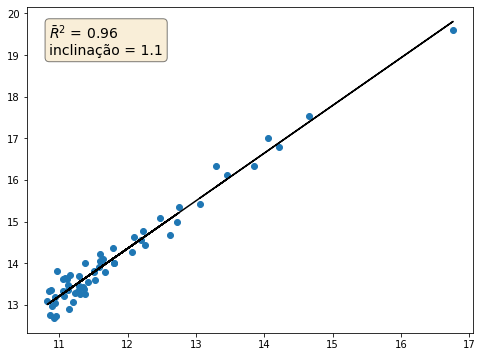

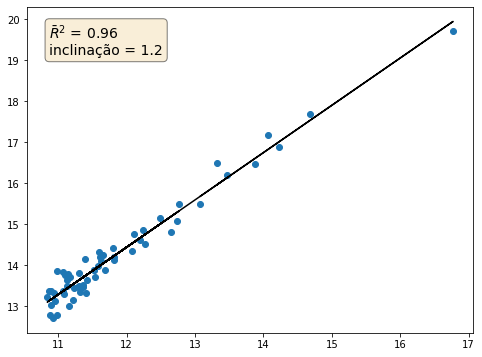

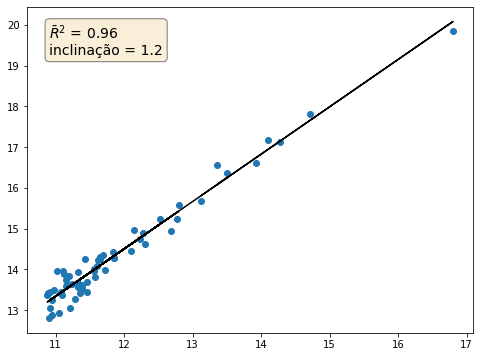

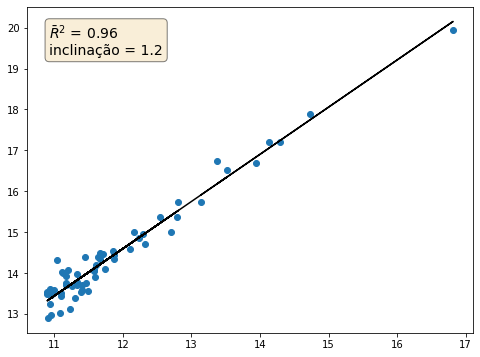

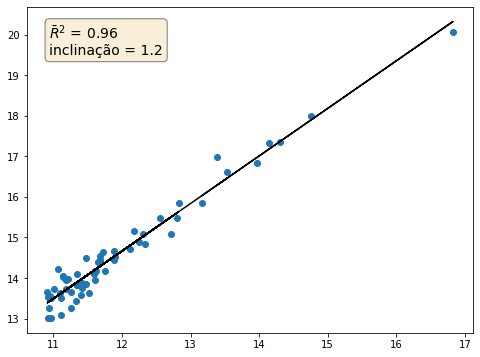

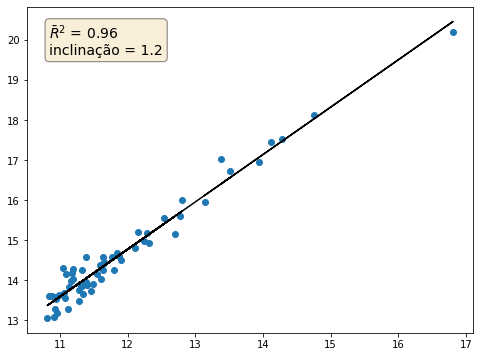

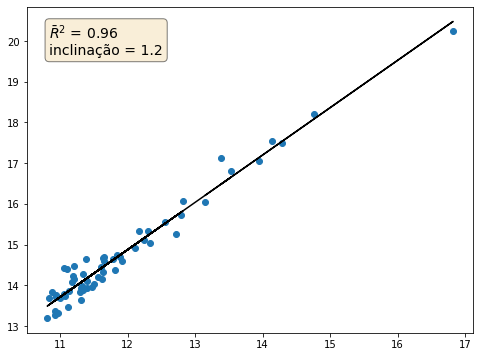

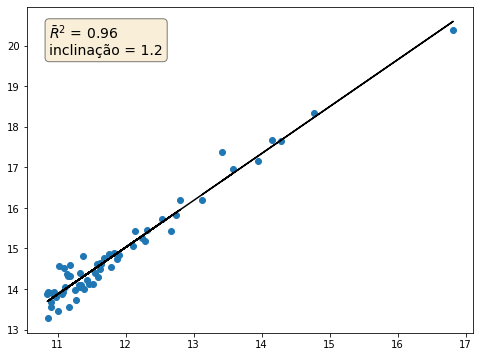

In [60]:
standardized_residuals = []
het = []
for index, ano in enumerate(anos):
    
    x=pop_500[ano]
    y=pib_500[ano]

    x_ = sm.add_constant(x)

    linear_model = sm.OLS(y,x_)
    result = linear_model.fit()
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(x, y,'o', label="data")
    ax.plot(x, result.fittedvalues, 'black', label="OLS")
    text = ("$\\barR^2$ = {:0.2f}".format(result.rsquared_adj))
    text1 = ('inclinação = {:0.2}'.format(result.params[1]))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, text+'\n'+text1, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    plt.savefig('L_reg_{0}'.format(ano))
    
    influence = result.get_influence()
    standardized_residuals.append(influence.resid_studentized_internal)
    het.append(het_white(influence.resid_studentized_internal, linear_model.exog))
    
print((het))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


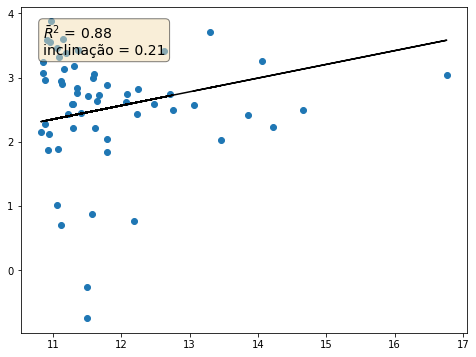

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


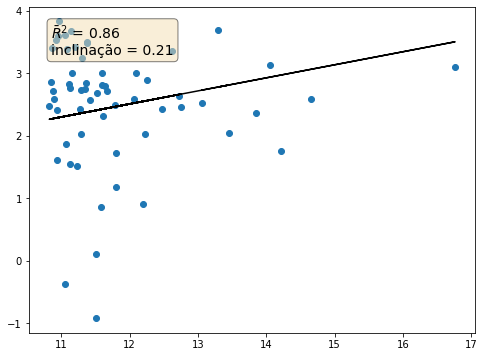

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


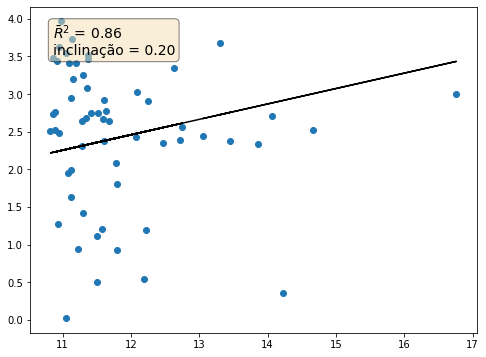

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


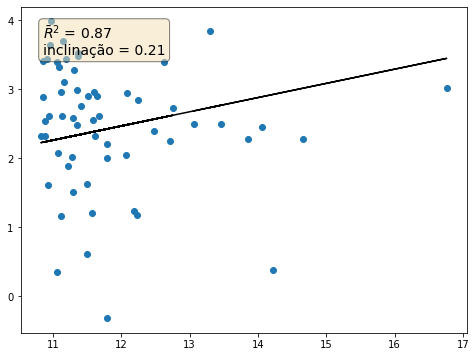

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


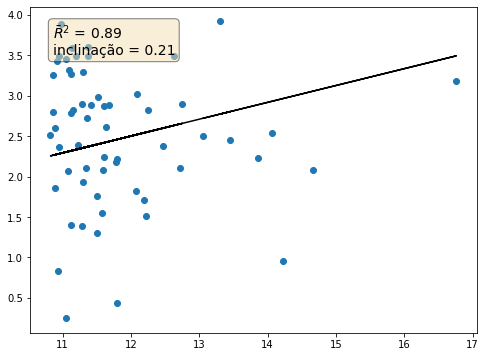

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


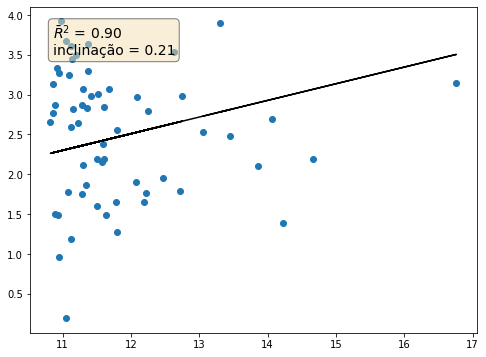

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


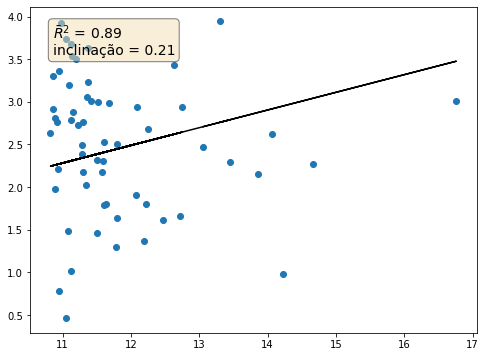

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


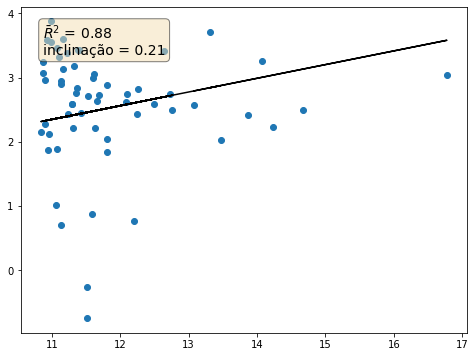

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


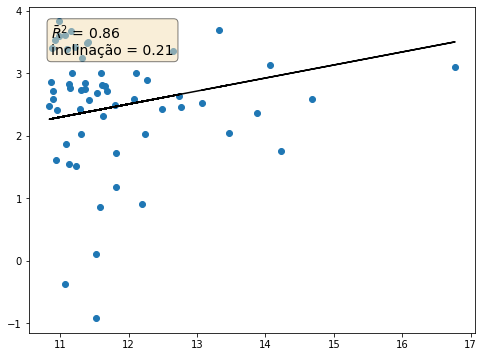

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


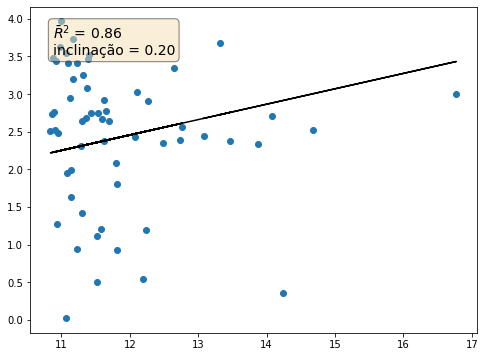

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


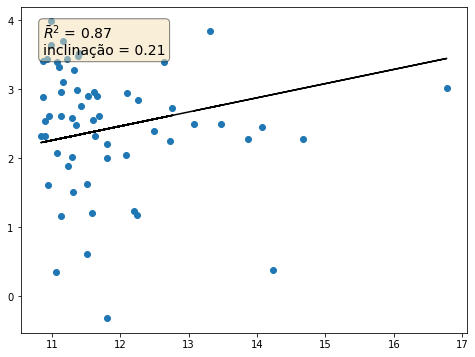

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


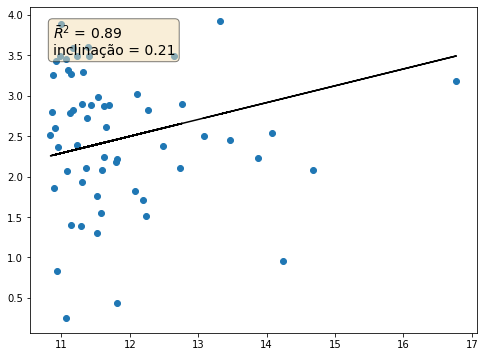

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


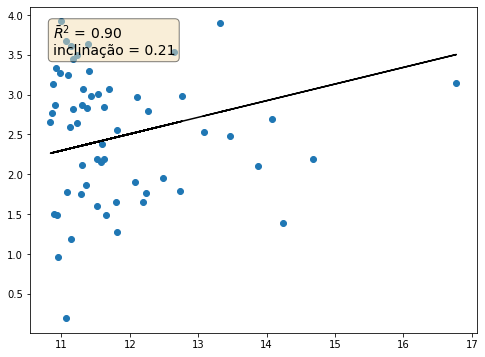

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


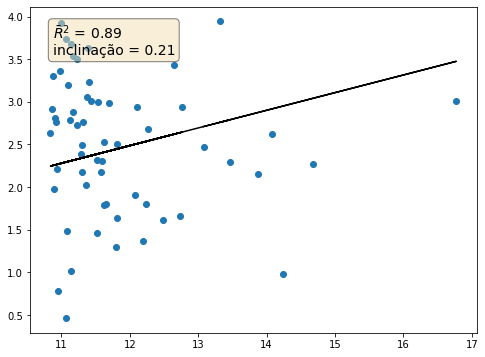

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


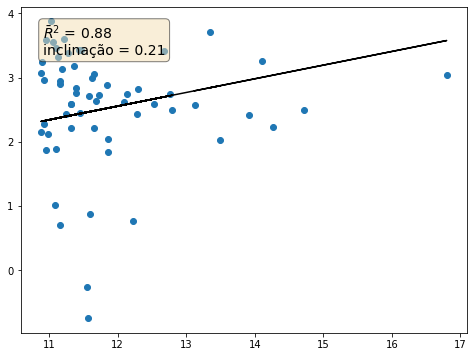

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


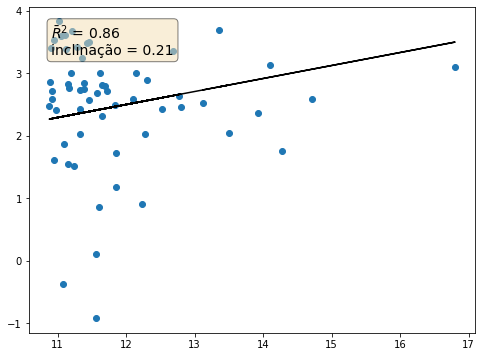

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


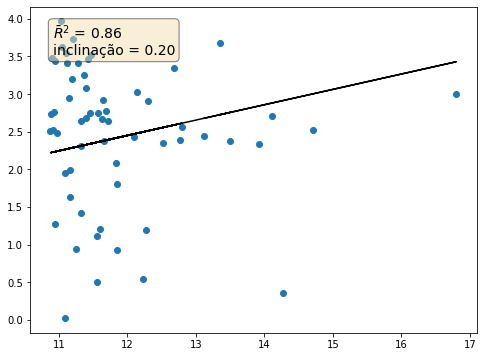

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


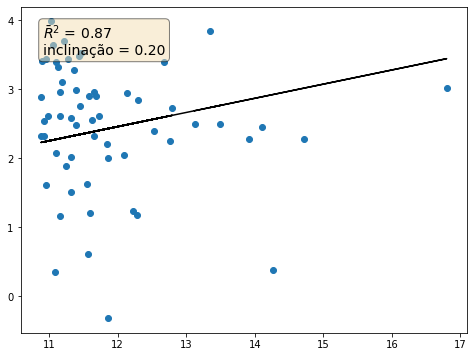

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


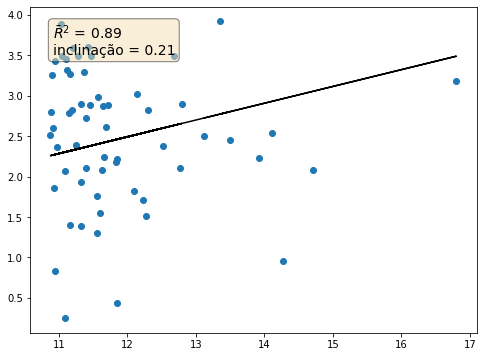

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


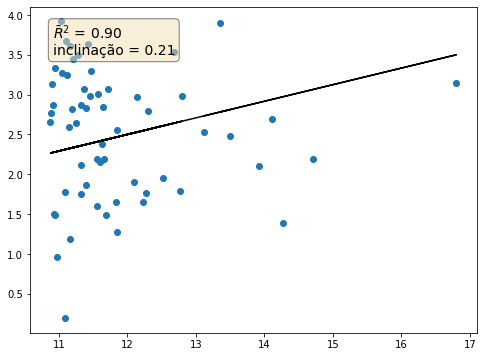

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


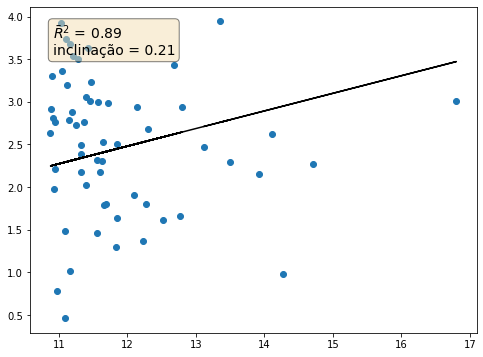

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


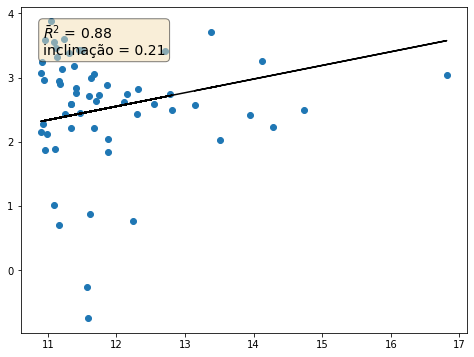

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


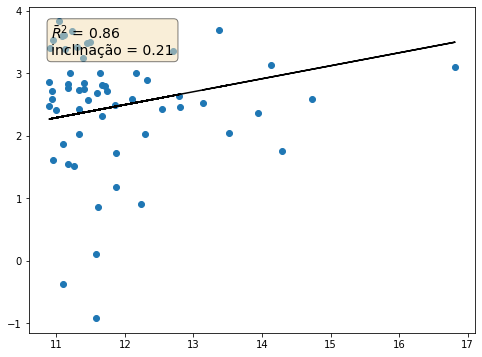

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


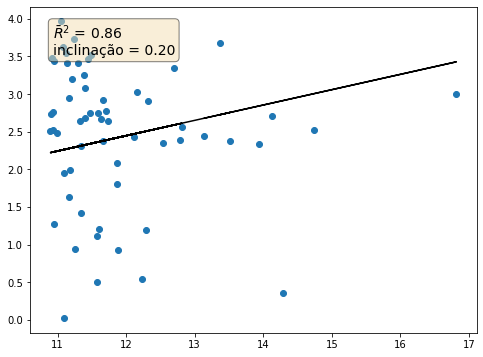

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


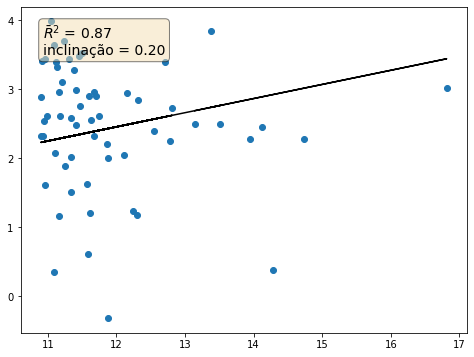

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


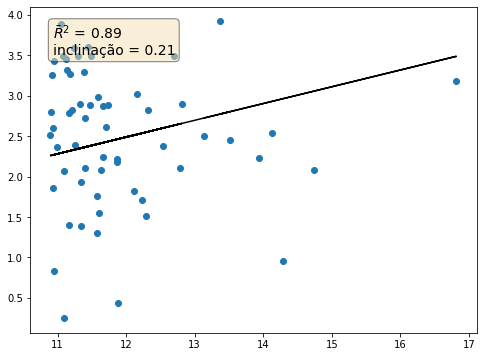

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


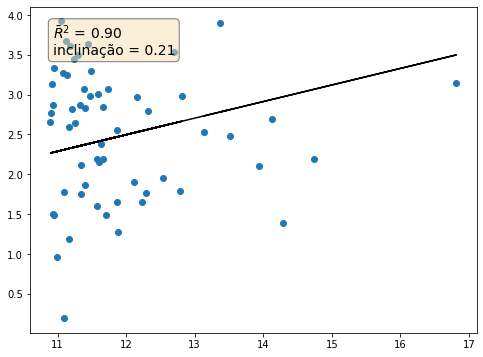

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


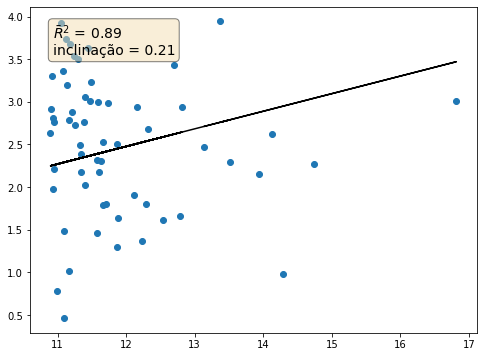

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


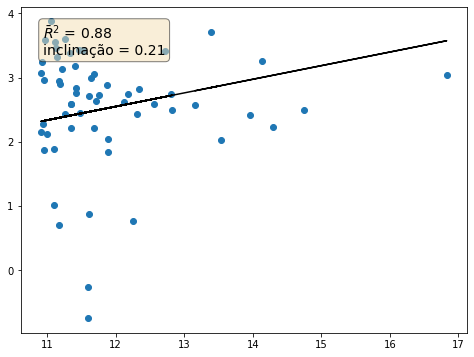

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


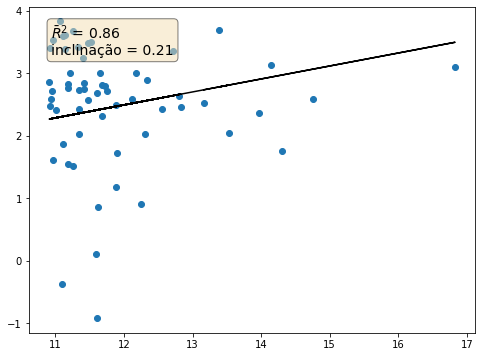

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


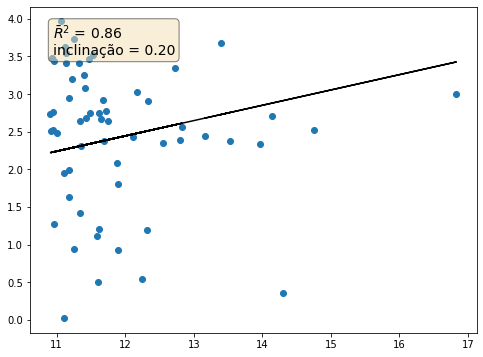

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


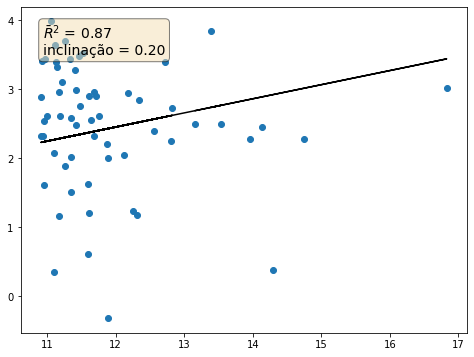

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


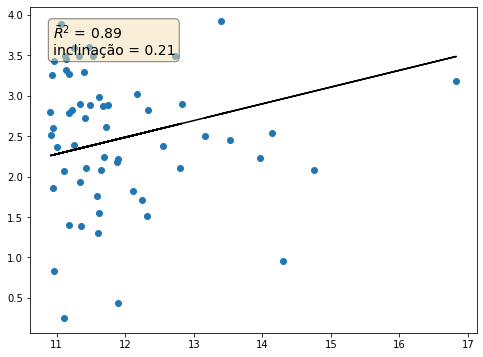

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


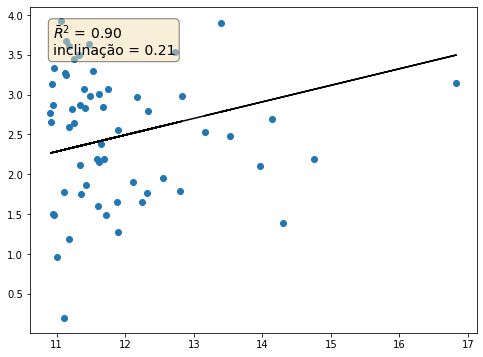

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


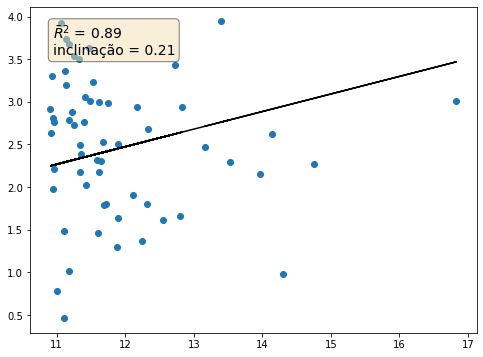

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


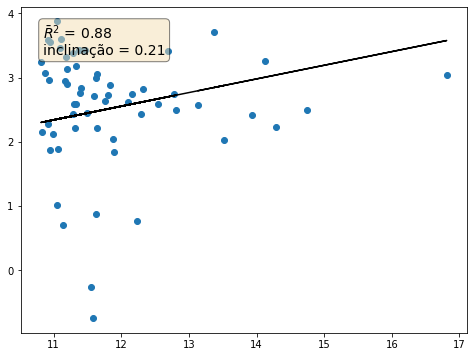

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


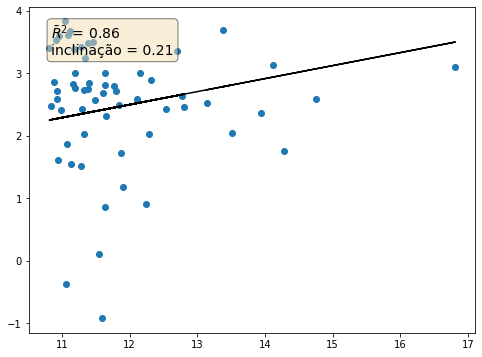

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


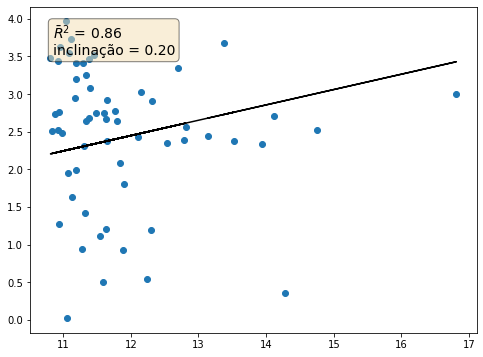

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


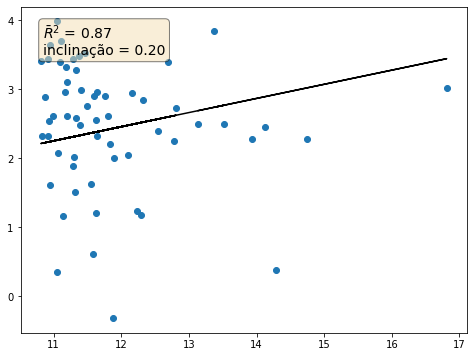

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


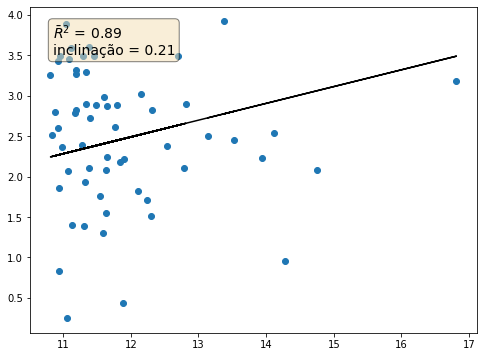

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


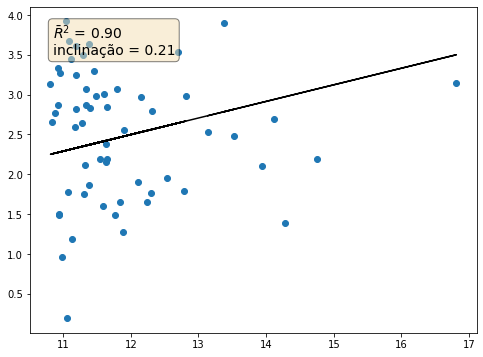

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


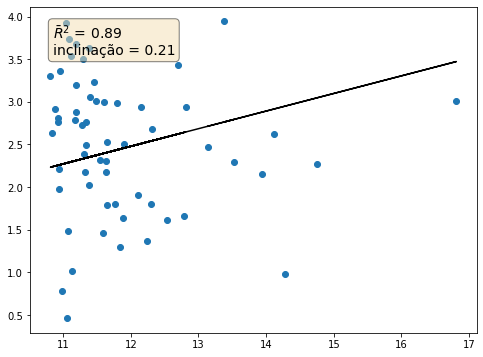

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


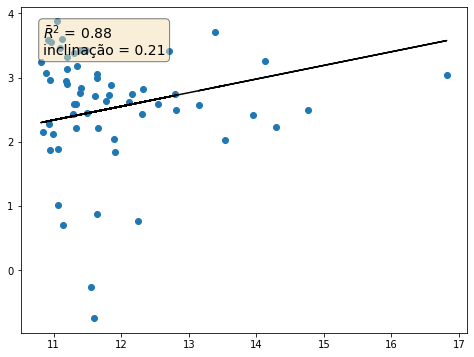

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


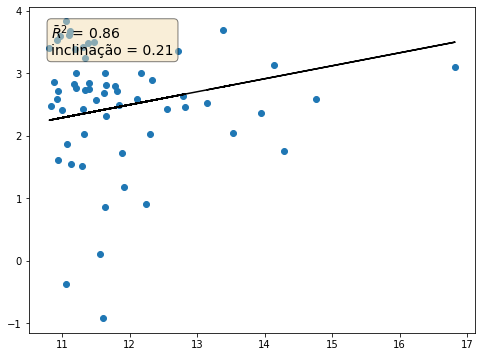

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


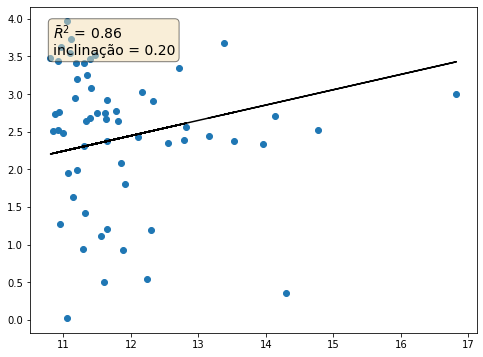

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


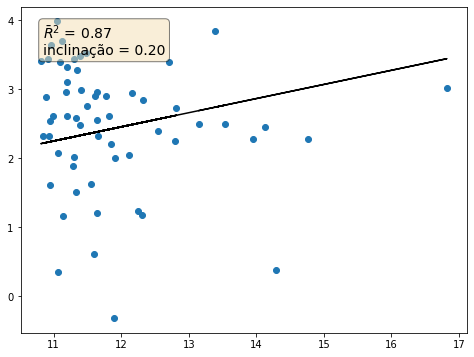

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


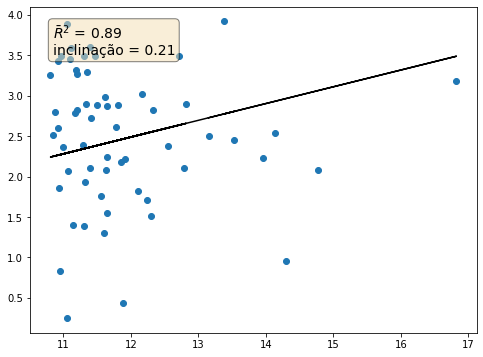

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


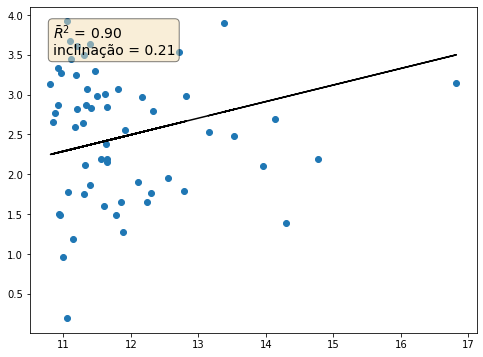

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


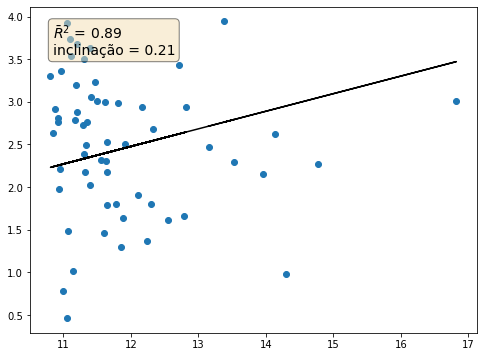

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


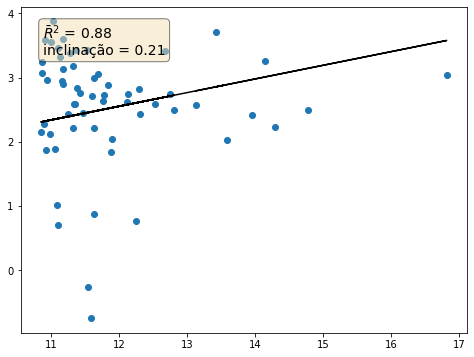

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


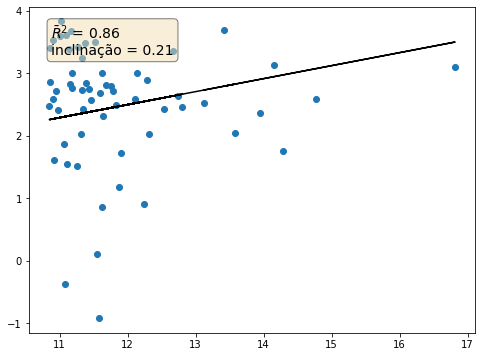

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


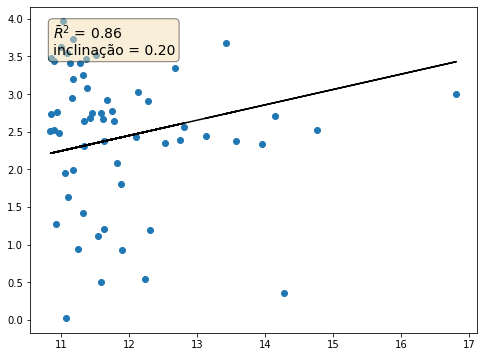

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


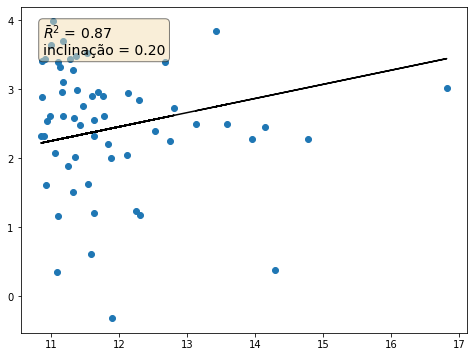

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


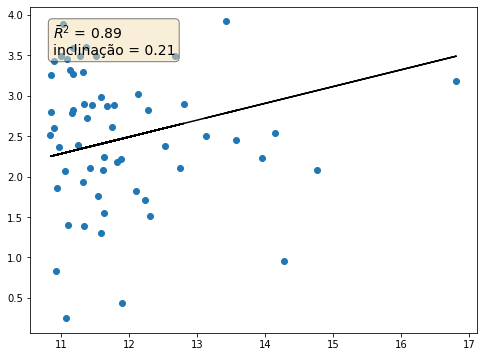

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


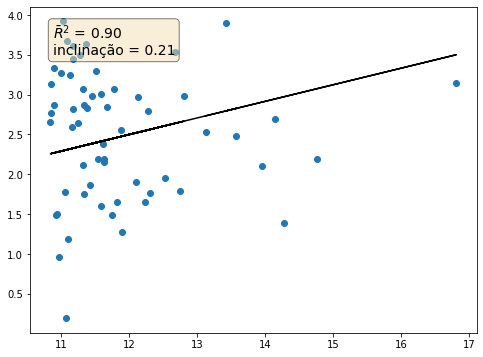

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


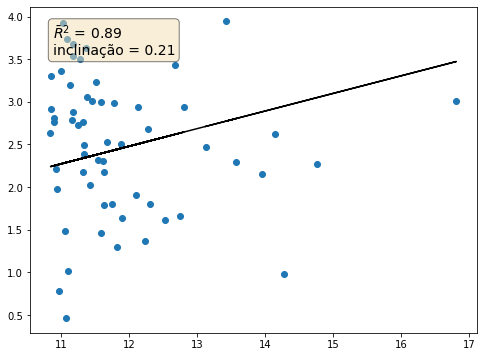

In [61]:
#het = []
for ano in anos:
    for i, j in enumerate(standardized_residuals[:-1]):
        
        delta = abs(standardized_residuals[i])+abs(standardized_residuals[i+1])
        
        #het = het.append(het_white(standardized_residuals[i], linear_model.exog))
        
        w = np.ones(pop_500[ano].shape[0])
        print(w)
        mod_wls = sm.WLS(np.log(delta*10), pop_500[ano], weights=1./(w ** 2))
        res_wls = mod_wls.fit()

        fig, ax = plt.subplots(figsize=(8,6))

        ax.plot(pop_500[ano], np.log(delta*10), 'o', label="data")
        ax.plot(pop_500[ano], res_wls.fittedvalues, 'black')
        text = ("$\\barR^2$ = {:0.2f}".format(res_wls.rsquared_adj))
        text1 = ('inclinação = {:0.2f}'.format(res_wls.params[0]))
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, text+'\n'+text1, transform=ax.transAxes, fontsize=14,
            horizontalalignment='left',verticalalignment='top', bbox=props)
        plt.savefig('wwls_{0}'.format(ano))
        plt.show()


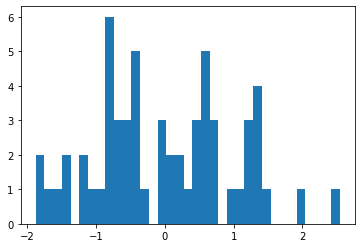

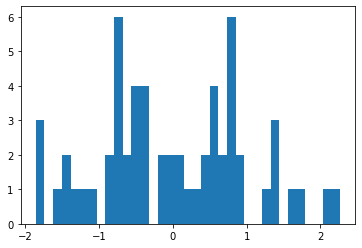

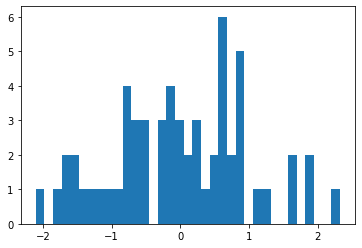

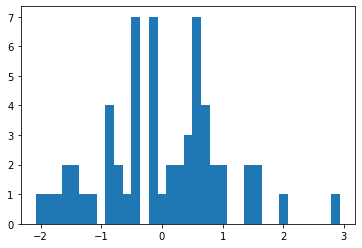

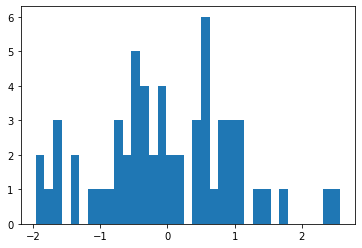

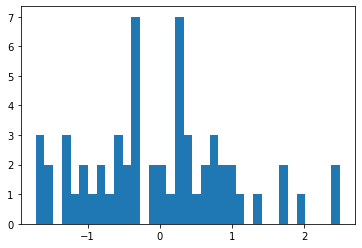

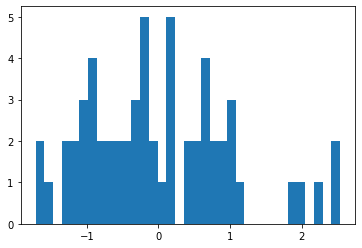

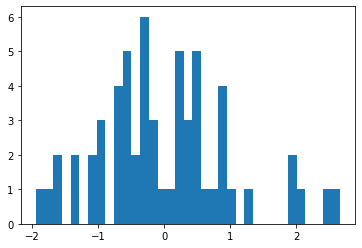

In [62]:
#for i, j in enumerate(standardized_residuals[:-1]):
#for ano in anos:
for index, residual in enumerate(standardized_residuals):
    plt.hist(residual, bins=35)
    plt.savefig('hist_residuos_{}'.format(index))
    plt.show()

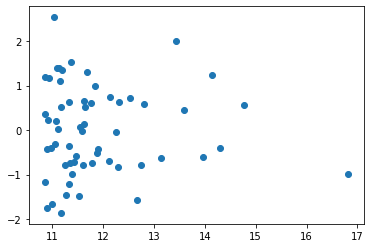

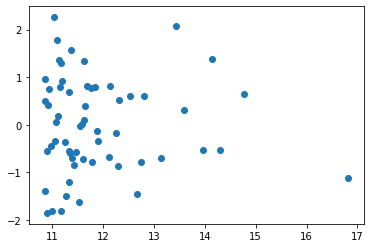

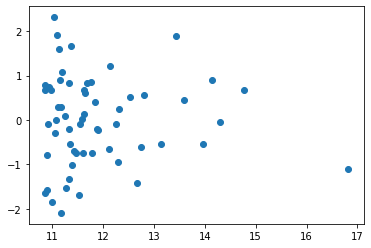

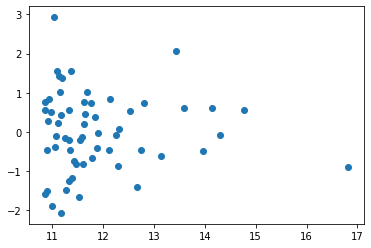

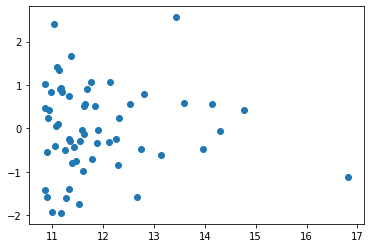

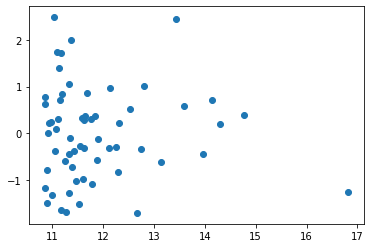

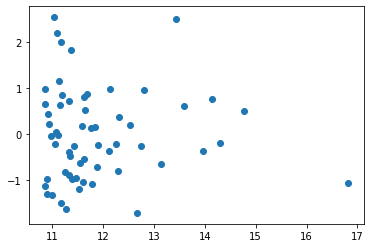

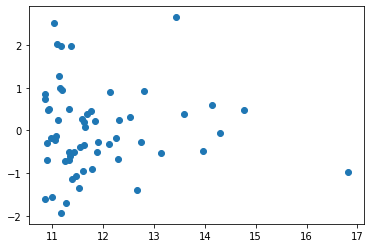

In [63]:
for index, residuo in enumerate(standardized_residuals):
    plt.scatter(pop_500[ano], residuo)
    plt.savefig('{}-pop-resid'.format(index))
    plt.show()